In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/shopping_trends.csv")

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.20,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.50,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.90,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.80,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.10,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df.shape

(3900, 19)

In [ ]:
df.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.duplicated().sum()

0

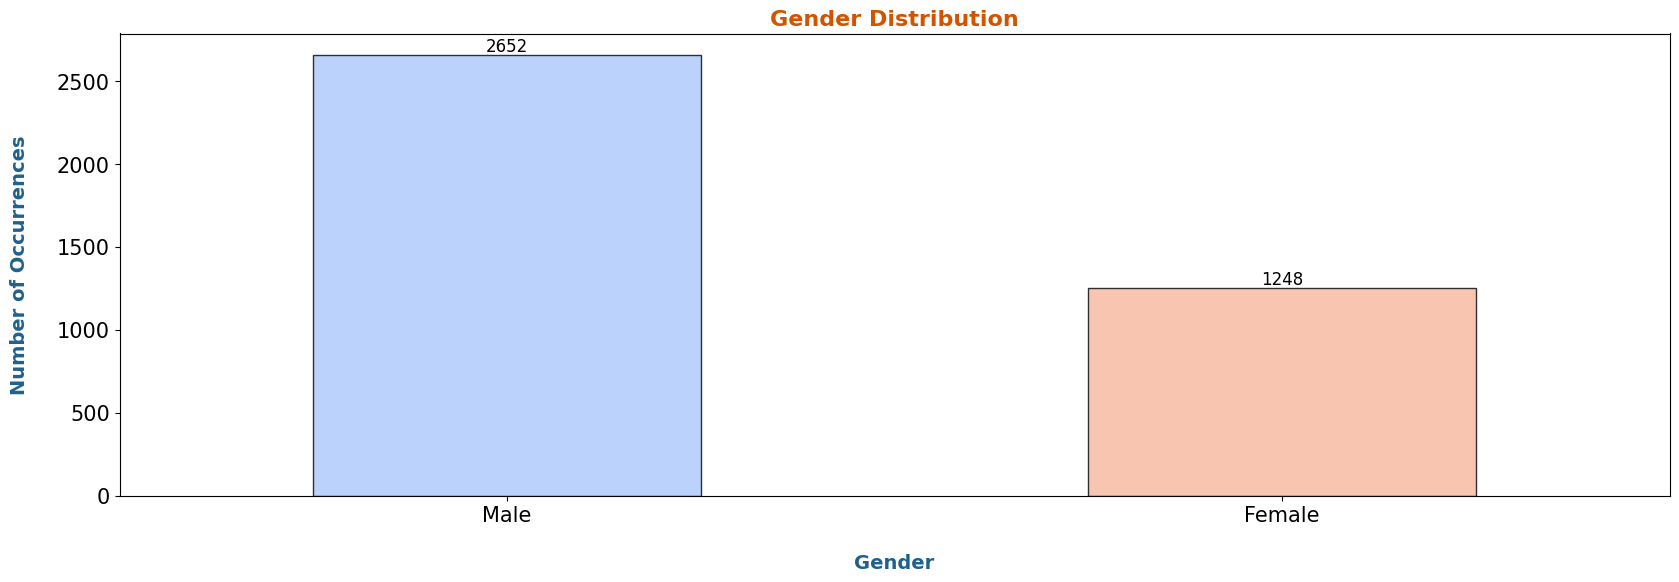

In [ ]:
# Set color palette
colors = sns.color_palette("coolwarm", n_colors=2)

# Create bar plot
plt.figure(figsize=(20, 6))
ax = df["Gender"].value_counts().plot(kind='bar', color=colors, edgecolor='black', alpha=0.8, rot=0)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', va='bottom', color='black', fontsize=12)

# Customize labels
ax.set_xticklabels(('Male', 'Female'))
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Gender', weight="bold", color="#1F618D", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#1F618D", fontsize=14, labelpad=20)
plt.title('Gender Distribution', fontsize=16, fontweight='bold', color="#D35400")

# Show the plot
plt.show()


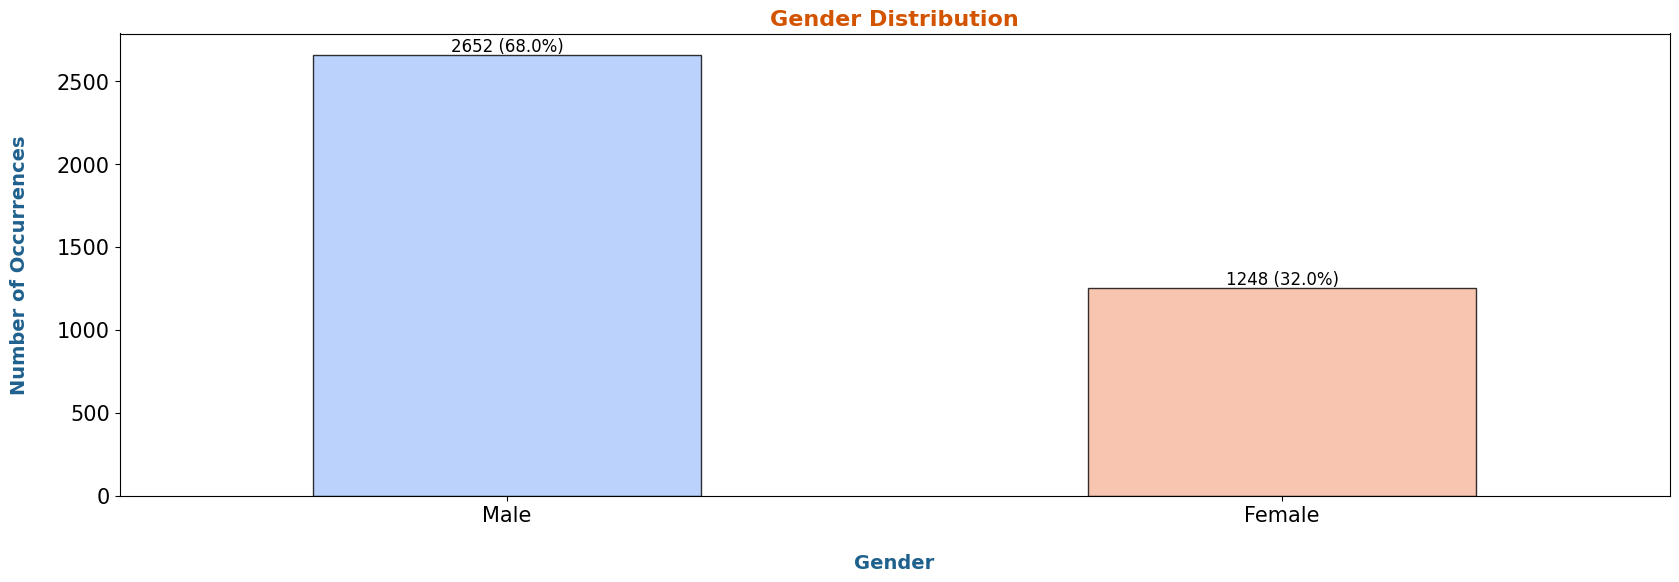

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("shopping_trends.csv")

# Set color palette
colors = sns.color_palette("coolwarm", n_colors=2)

# Calculate percentages
gender_counts = df["Gender"].value_counts()
total = gender_counts.sum()
percentages = (gender_counts / total) * 100

# Create bar plot
plt.figure(figsize=(20, 6))
ax = gender_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.8, rot=0)

# Annotate bars with counts and percentages
for p, perc in zip(ax.patches, percentages):
    ax.annotate(f'{int(p.get_height())} ({perc:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', va='bottom', color='black', fontsize=12)

# Customize labels
ax.set_xticklabels(('Male', 'Female'))
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Gender', weight="bold", color="#1F618D", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#1F618D", fontsize=14, labelpad=20)
plt.title('Gender Distribution', fontsize=16, fontweight='bold', color="#D35400")

# Show the plot
plt.show()

In [ ]:
df["Category"].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


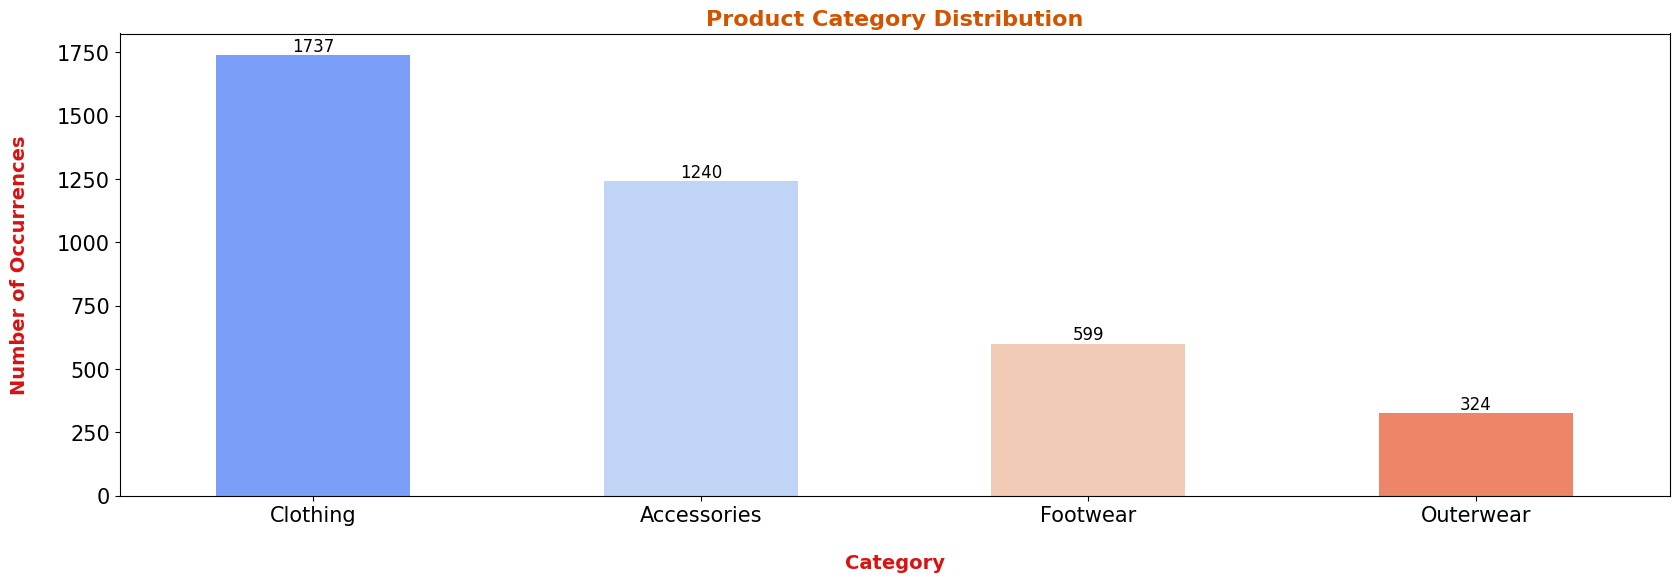

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors using a seaborn palette
colors = sns.color_palette("coolwarm", n_colors=4)

# Creating the bar chart
plt.figure(figsize=(20, 6))
ax = df["Category"].value_counts().plot(kind='bar', color=colors, rot=0)

# Set custom tick labels for the 'Category' column
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

# Annotating each bar with its value
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', va='bottom', color='black', fontsize=12)

# Customize axis ticks size
ax.tick_params(axis='both', labelsize=15)

# Add labels and title with custom colors and fonts
plt.xlabel('Category', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.title('Product Category Distribution', fontsize=16, fontweight='bold', color="#D35400")

# Show the plot
plt.show()


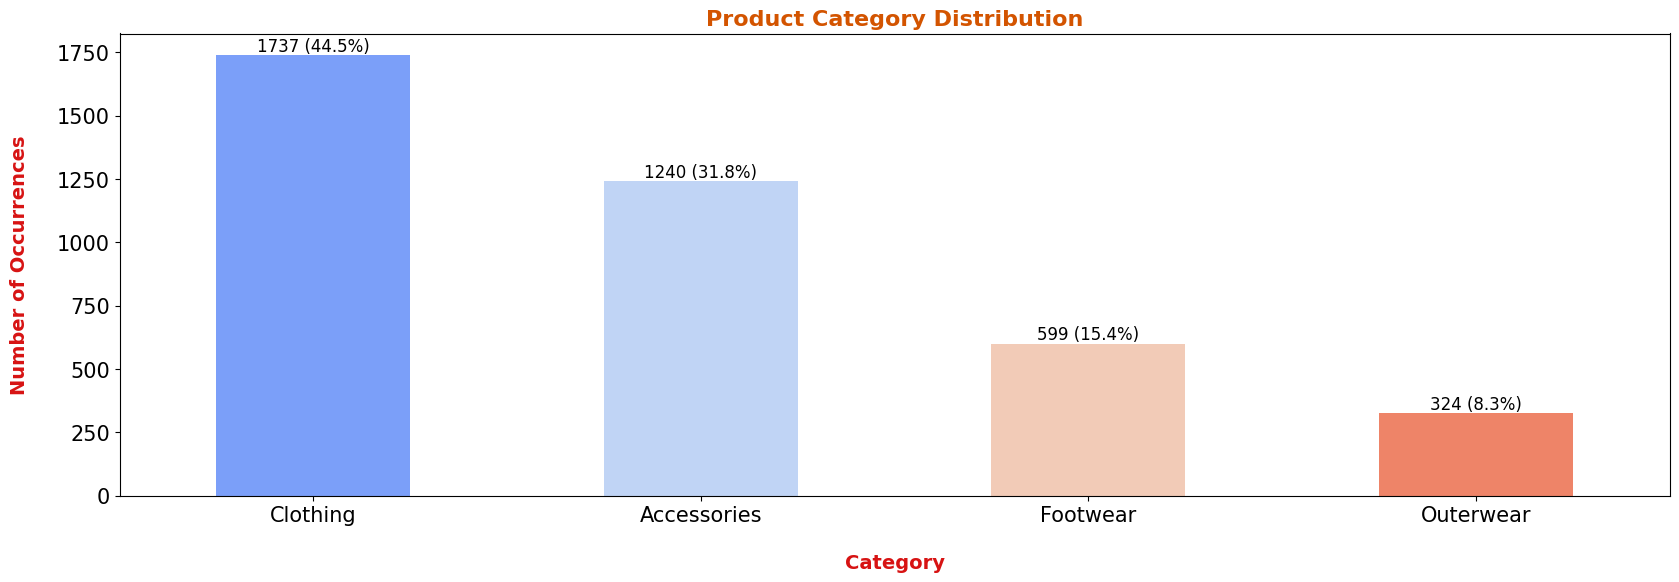

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors using a seaborn palette
colors = sns.color_palette("coolwarm", n_colors=4)

# Calculate percentages
category_counts = df["Category"].value_counts()
total = category_counts.sum()
percentages = (category_counts / total) * 100

# Creating the bar chart
plt.figure(figsize=(20, 6))
ax = category_counts.plot(kind='bar', color=colors, rot=0)

# Set custom tick labels for the 'Category' column
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

# Annotating each bar with its value and percentage
for p, perc in zip(ax.patches, percentages):
    ax.annotate(f'{int(p.get_height())} ({perc:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', va='bottom', color='black', fontsize=12)

# Customize axis ticks size
ax.tick_params(axis='both', labelsize=15)

# Add labels and title with custom colors and fonts
plt.xlabel('Category', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.title('Product Category Distribution', fontsize=16, fontweight='bold', color="#D35400")

# Show the plot
plt.show()

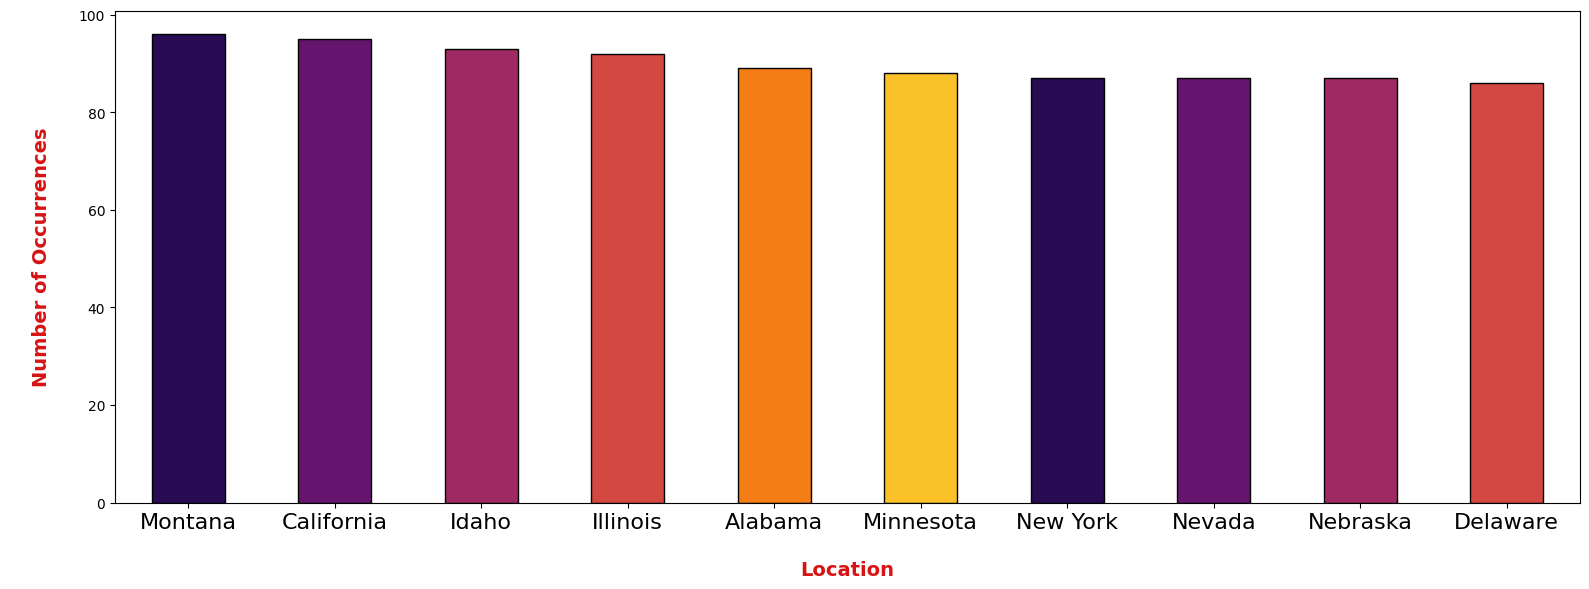

In [ ]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [ ]:
df["Subscription Status"].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


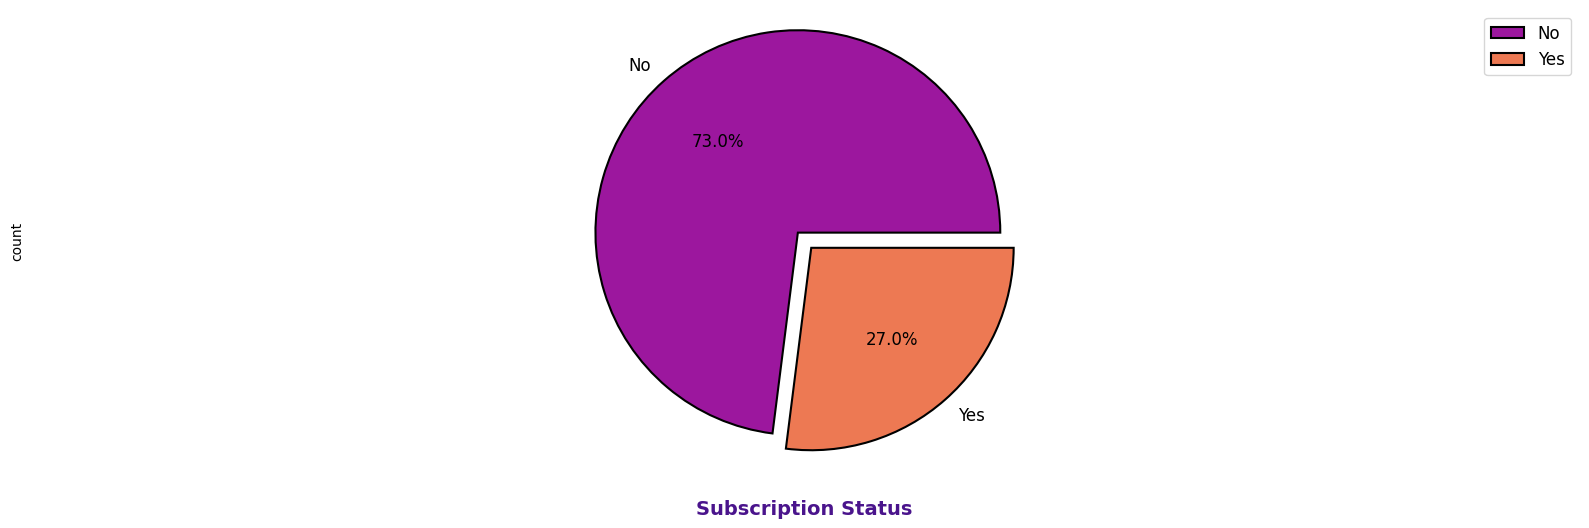

In [ ]:
colors = sns.color_palette("plasma", n_colors=2)

# Creating the pie chart
plt.figure(figsize=(20, 6))

# Get the counts for the 'Subscription Status' column
counts = df["Subscription Status"].value_counts()

# Exploding the 'Yes' slice slightly for emphasis
explode = (0, 0.1)

# Plotting the pie chart with customizations
ax = counts.plot(kind='pie',
                 fontsize=12,
                 colors=colors,
                 explode=explode,
                 autopct='%1.1f%%',
                 wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Setting the labels and styling
plt.xlabel('Subscription Status', weight="bold", color="#4A148C", fontsize=14, labelpad=20)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Adding a legend with customized labels
plt.legend(labels=counts.index, loc="best", fontsize=12)

# Show the plot
plt.show()

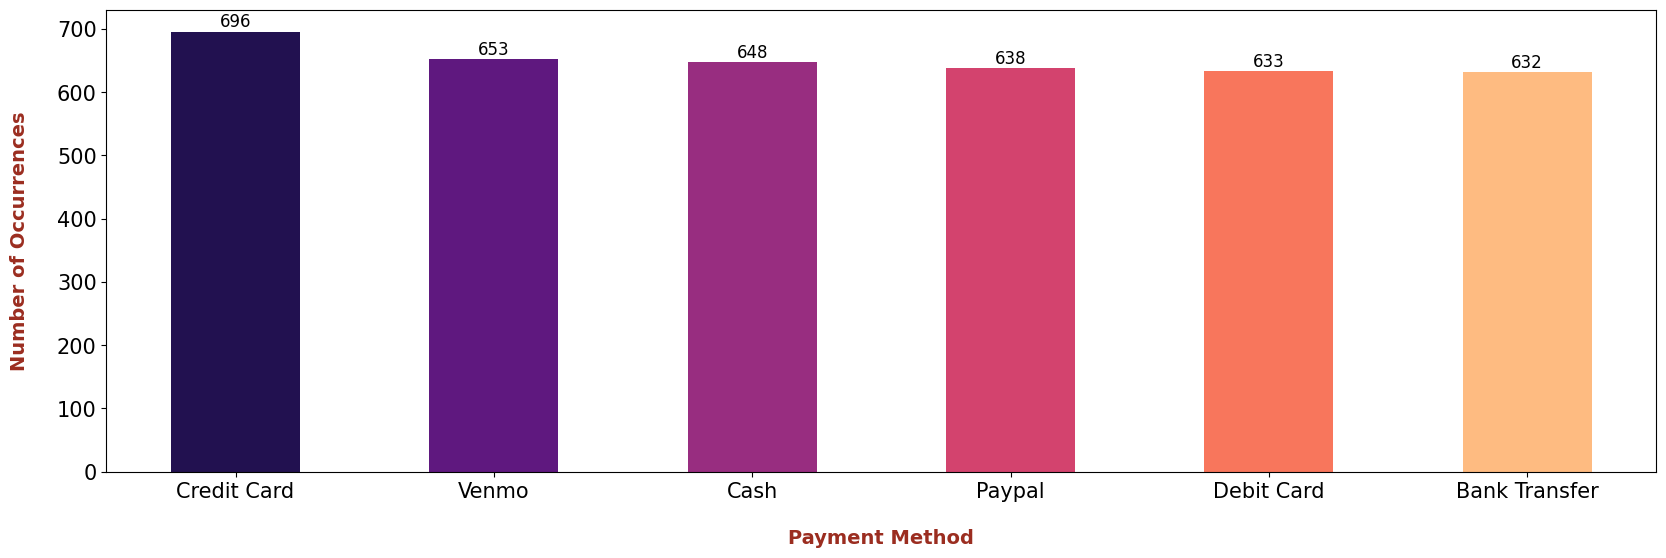

In [ ]:
colors = sns.color_palette("magma", n_colors=6)

# Creating the bar chart
plt.figure(figsize=(20, 6))
ax = df["Payment Method"].value_counts().plot(kind='bar', color=colors, rot=0)

# Set custom xticklabels
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

# Annotating each bar with its value
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', va='bottom', color='black', fontsize=12)

# Customize axis ticks size
ax.tick_params(axis='both', labelsize=15)

# Add labels and title with custom colors and fonts
plt.xlabel('Payment Method', weight="bold", color="#9B2D20", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#9B2D20", fontsize=14, labelpad=20)

# Show the plot
plt.show()

In [ ]:
df["Frequency of Purchases"].value_counts()

,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


In [ ]:
feature = 'Season'
feature_df = df[feature]
value_counts = feature_df.value_counts()
value_counts

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


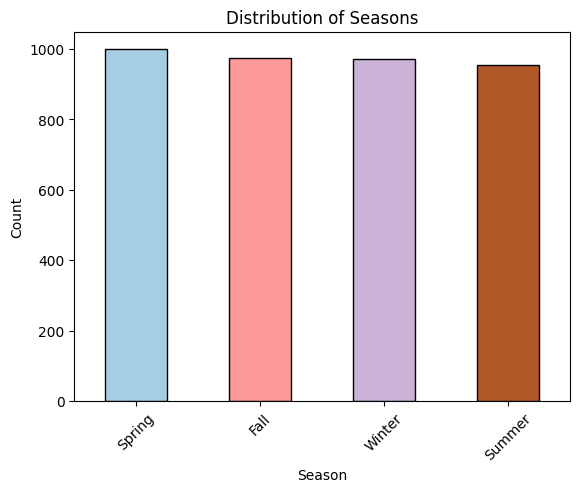

In [ ]:
colors = plt.cm.Paired(np.linspace(0, 1, len(value_counts)))

# Plot bar chart with different colors
value_counts.plot(kind='bar', color=colors, edgecolor='black')

# Labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Distribution of Seasons')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [ ]:
np.round(df.drop('Customer ID', axis=1).describe().transpose(), 2)


,count,mean,std,min,25%,50%,75%,max
Age,"3,900.00",44.07,15.21,18.00,31.00,44.00,57.00,70.00
Purchase Amount (USD),"3,900.00",59.76,23.69,20.00,39.00,60.00,81.00,100.00
Review Rating,"3,900.00",3.75,0.72,2.50,3.10,3.70,4.40,5.00
Previous Purchases,"3,900.00",25.35,14.45,1.00,13.00,25.00,38.00,50.00
Frequency_Encoded,"3,900.00",2.97,2.00,0.00,1.00,3.00,5.00,6.00


In [ ]:
# Identify categorical columns by selecting columns with data type 'object'
categorical_columns = df.select_dtypes(include=["object"]).columns

# Identify numerical columns by selecting columns with data types 'int64' and 'float64'
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Initialize a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# Iterate over each categorical column to apply Label Encoding
for col in categorical_columns:
    # Initialize a LabelEncoder for the current column
    label_encoders[col] = LabelEncoder()

    # Fit the LabelEncoder on the column data and transform it
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
X = df.drop(["Customer ID", "Gender"], axis=1)
y = df["Gender"]

In [ ]:
X

,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Frequency_Encoded
0,55,2,1,53,16,0,7,3,3.10,1,2,1,1,1,14,5,3,3
1,19,23,1,64,18,0,12,3,3.10,1,0,1,1,1,2,1,3,3
2,50,11,1,73,20,2,12,1,3.10,1,1,2,1,1,23,2,6,6
3,21,14,2,90,38,1,12,1,3.50,1,4,3,1,1,49,4,6,6
4,45,2,1,49,36,1,21,1,2.70,1,1,2,1,1,31,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,9,1,28,45,0,21,2,4.20,0,1,0,0,0,32,5,6,6
3896,52,0,0,49,14,0,23,1,4.50,0,4,5,0,0,41,0,1,1
3897,46,1,0,33,29,0,8,1,2.90,0,2,4,0,0,24,5,5,5
3898,44,17,2,77,22,2,3,2,3.80,0,4,1,0,0,24,5,6,6


In [ ]:
y

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
3895,0
3896,0
3897,0
3898,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Let's standardize features first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors for neural network models
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Create a custom dataset class for PyTorch
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create datasets and dataloaders
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Dictionary to store performance metrics
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'AUC': []
}

In [ ]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_preds = dt_model.predict(X_test_scaled)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Create a function to evaluate and display results
def evaluate_model(name, y_true, y_pred, y_proba=None):
    print(f"===== {name} =====")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Calculate metrics for summary table
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Add to performance metrics
    performance_metrics['Model'].append(name)
    performance_metrics['Accuracy'].append(acc)
    performance_metrics['F1 Score'].append(f1)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # 1. Confusion Matrix (first)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')


    roc_auc = None
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        roc_auc = auc(fpr, tpr)
        performance_metrics['AUC'].append(roc_auc)

        axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
        axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title(f'ROC Curve - {name}')
        axes[1].legend(loc='lower right')
    else:
        performance_metrics['AUC'].append(None)

    plt.tight_layout()
    plt.show()

    return roc_auc

===== Decision Tree =====

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       228
           1       0.81      0.81      0.81       552

    accuracy                           0.73       780
   macro avg       0.68      0.68      0.68       780
weighted avg       0.73      0.73      0.73       780



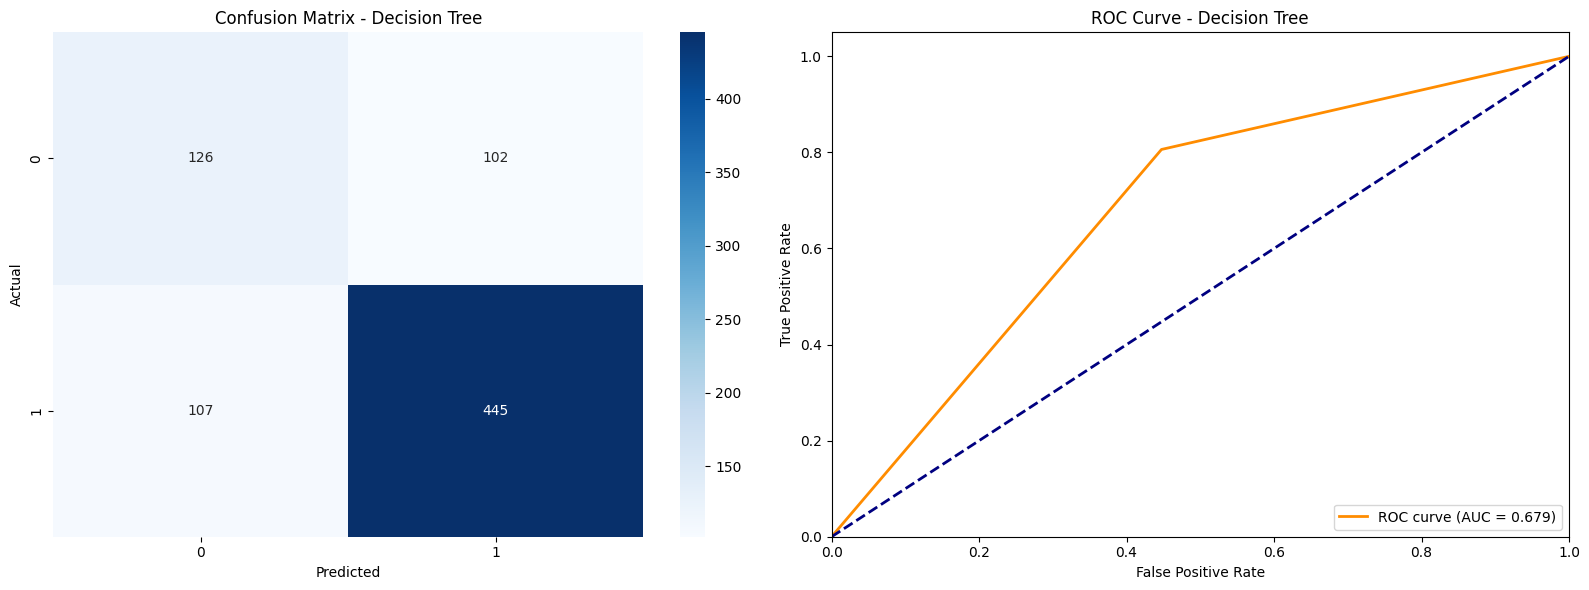

In [ ]:
dt_auc = evaluate_model("Decision Tree", y_test, dt_preds, dt_probs)

In [ ]:
# Feature Importance (displayed after all model evaluations)
# Create a figure to compare feature importances across all models
plt.figure(figsize=(15, 10))

# 1. Logistic Regression Feature Importance
feature_importances = {}
# 2. Decision Tree Feature Importance
if hasattr(dt_model, 'feature_importances_'):
    dt_importance = dt_model.feature_importances_
    feature_importances['Decision Tree'] = dt_importance

<Figure size 1500x1000 with 0 Axes>

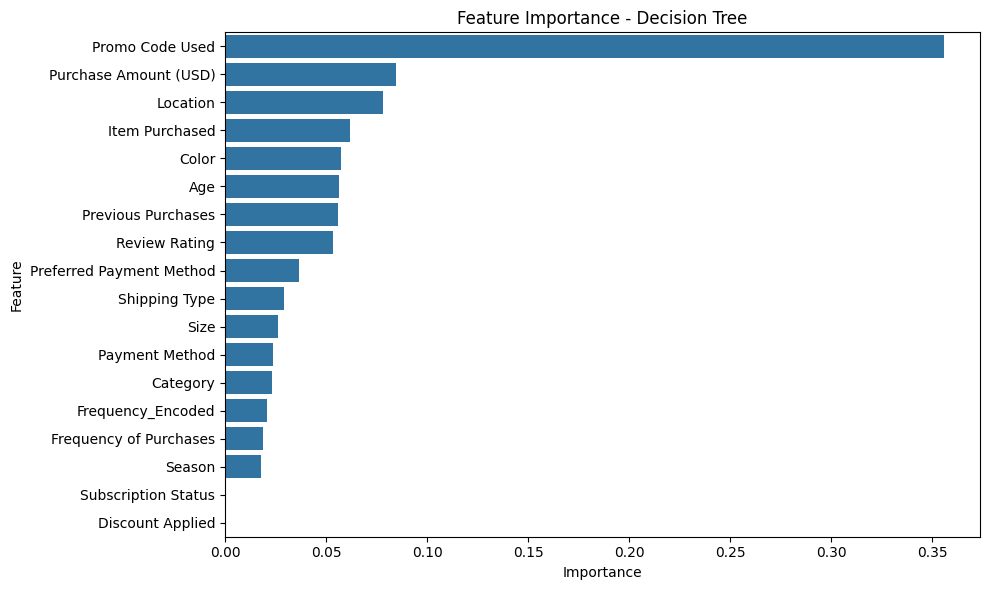


Decision Tree Feature Importance:
                     Feature  Importance
13           Promo Code Used        0.36
3      Purchase Amount (USD)        0.08
4                   Location        0.08
1             Item Purchased        0.06
6                      Color        0.06
0                        Age        0.06
14        Previous Purchases        0.06
8              Review Rating        0.05
15  Preferred Payment Method        0.04
11             Shipping Type        0.03
5                       Size        0.03
10            Payment Method        0.02
2                   Category        0.02
17         Frequency_Encoded        0.02
16    Frequency of Purchases        0.02
7                     Season        0.02
9        Subscription Status        0.00
12          Discount Applied        0.00


In [ ]:
for i, (model_name, importance) in enumerate(feature_importances.items()):
    plt.figure(figsize=(10, 6))
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance - {model_name}')
    plt.tight_layout()
    plt.show()

    print(f"\n{model_name} Feature Importance:")
    print(importance_df)

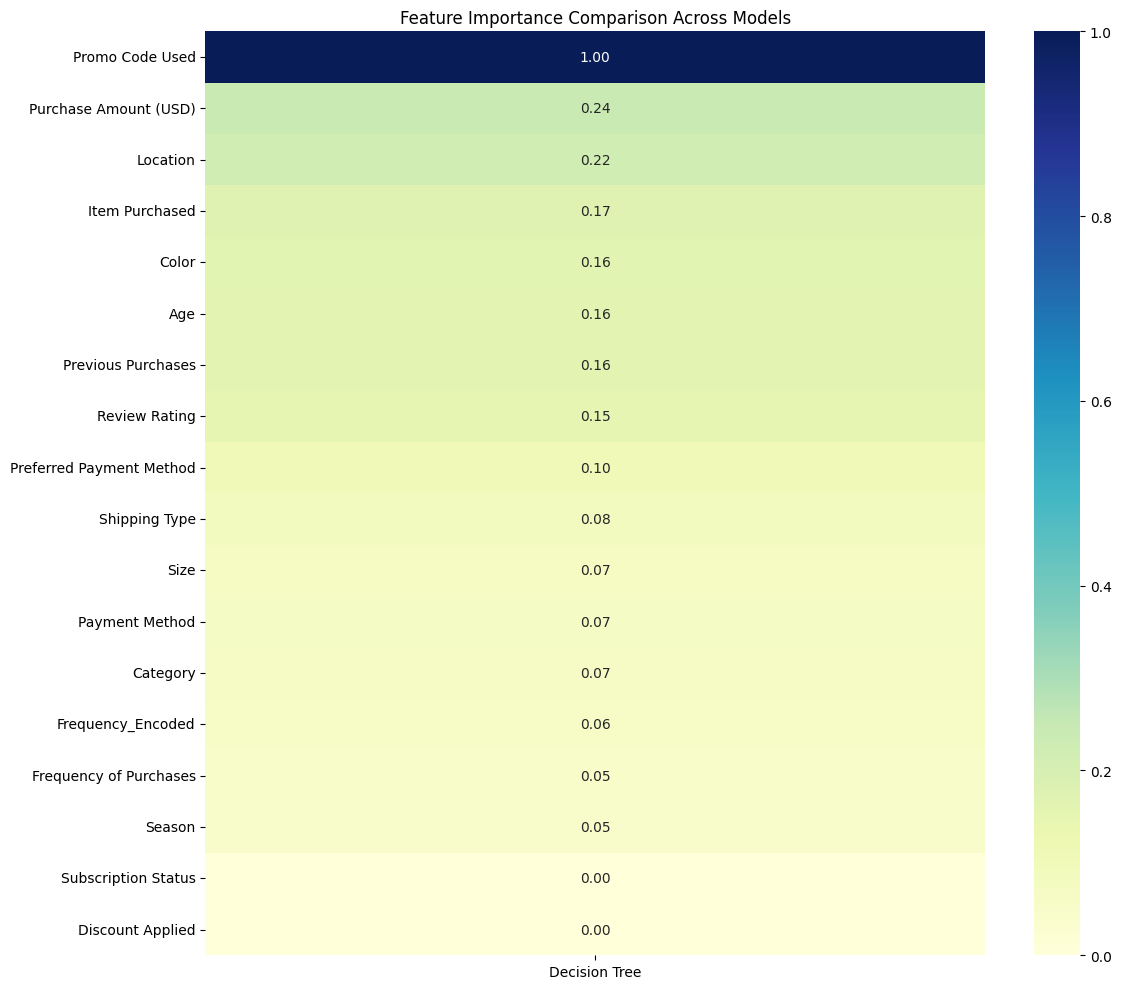

In [ ]:
# Create a heatmap to compare feature importances across models
importance_comparison = pd.DataFrame(
    {model_name: imp for model_name, imp in feature_importances.items()},
    index=X.columns
)

# Normalize each column to [0,1] for fair comparison
for column in importance_comparison.columns:
    max_val = importance_comparison[column].max()
    if max_val > 0:  # Avoid division by zero
        importance_comparison[column] = importance_comparison[column] / max_val

# Sort by average importance
importance_comparison['Average'] = importance_comparison.mean(axis=1)
importance_comparison = importance_comparison.sort_values('Average', ascending=False)
importance_comparison = importance_comparison.drop('Average', axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(importance_comparison, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Feature Importance Comparison Across Models')
plt.tight_layout()
plt.show()